In [ ]:
! pip install sklearn-pandas

In [88]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import keras_tuner
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.wrappers import SKLearnClassifier
import keras.utils 
from keras.callbacks import * 


SVM-Kernels

Three different types of SVM-Kernels are displayed below.
The polynomial and RBF are especially useful when the
data-points are not linearly separable.



---------------- SVC of binary class ------------------

Some properties of Classifier
-------------------------------
clf.coef_       
    Coefficients for each feature 
    only for linear problem
clf.support_
    SupportVectorIndices 
    Vector of indices that specify the rows in the training data X, 
    that were selected as support vectors 
clf.support_vectors_  
    are subset of features (rows of X) which are used for decision boundary
clf.n_support_ 
    get number of support vectors for each class

clf.decision_function
    decision function that tells us how close to the seperating line we are 
    (close to the boundary means a low-confidence decision)
    Returns (n_samples, n_classes * (n_classes-1) / 2) for ovo, 
    for ovr, the shape is (n_samples, n_classes).
    each value is proportional to the dist

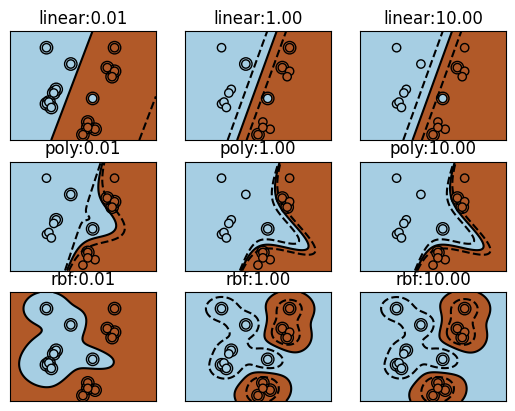

In [6]:
%run code\5.1.plot_svm_kernels.py

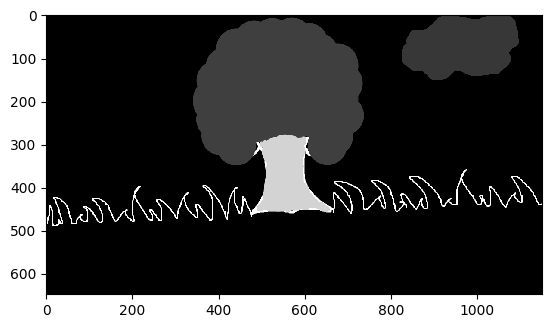

In [133]:
from PIL import Image
path = r"4.jpg"
im = Image.open(path).convert("L")
data = np.asarray(im)
plt.imshow(data, cmap=plt.cm.gray_r, interpolation='nearest')  #cmap = Color Map


In [9]:
data.shape

(648, 1152)

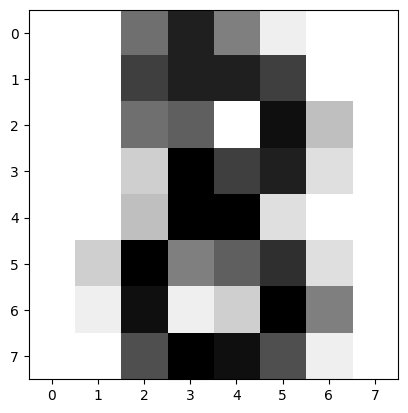

In [13]:
digits = load_digits()
X,y = digits.data, digits.target
X.shape, y.shape
plt.imshow(X[8].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [11]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [48]:
pca1 = PCA()
svm1 = SVC(kernel='poly', gamma='scale')
pca1
pipe = Pipeline([
    ('pca',PCA()),
    ('svc',SVC(kernel='poly',gamma='scale'))])
params = dict(pca__n_components = [2, 5,10,20,40,55,64],
                    svc__C =[0.001, 0.01, 0.1, 1, 10])
#split test train, test = 0.1
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.1)
#then do RandomizedSearchCV
search=RandomizedSearchCV(pipe,params,cv=5)
search.fit(X_train,y_train)
#print confusion matrix and acciracy
best_model=search.best_estimator_
yHat=best_model.predict(X_test)
confusion_matrix(y_train,best_model.predict(X_train))

#for train 

#and test 
print(best_model.score(X_test, y_test))
print(confusion_matrix(y_test, best_model.predict(X_test)))

1.0
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


In [82]:
im.thumbnail( (10,10) )
data = np.asarray(im)
data.shape  #(8,6)

(5, 8)

In [83]:
data = np.vstack( (data, np.array([255]*24).reshape(3,8)) )

In [84]:
data.shape

(8, 8)

In [85]:
best_model.predict([(255-data).ravel()])


array([1])

In [ ]:
C:\Users\Seshagiri\Downloads\windows_10_cmake_Release_Graphviz-12.2.1-win64\Graphviz-12.2.1-win64\bin

In [76]:
!pip install graphviz


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import os
os.environ['PATH'] = r"C:\Users\Seshagiri\Downloads\windows_10_cmake_Release_Graphviz-12.2.1-win64\Graphviz-12.2.1-win64\bin;" + os.environ['PATH'];


In [78]:
%run code\6.1.decision_tree.py

------------------------ iris data DecisionTreeClassifier ---------
With entropy
check default value of all params
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Training Accuracy 1.0
Test data Accuracy 0.9736842105263158
Predicted class for test data ...
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
the probability of each class can be predicted(test data)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

In [86]:
X,y,255-data
svm = RandomForestClassifier()
svm.fit(X,y)
svm.predict([(255-data).ravel()])

array([1])

In [98]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import keras_tuner
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.wrappers import SKLearnClassifier
import keras.utils 
from keras.callbacks import * 
pca1 = PCA()
svm1 = SVC(kernel='poly', gamma='scale')
pca1
pipe = Pipeline([
    ('pca',PCA()),
    ('svc',SVC(kernel='poly',gamma='scale'))])
earlyStopping = dict(validation_fraction=0.2, n_iter_no_change=5, tol=0.01)
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 
                    'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}
settings = {'learning_rate': 0.1, 'max_features': 2}
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.1)
#then do RandomizedSearchCV
search=RandomForestClassifier(pipe,params)
search.fit(X_train,y_train)



TypeError: RandomForestClassifier.__init__() takes from 1 to 2 positional arguments but 3 were given

In [96]:
earlyStopping = dict(validation_fraction=0.2, n_iter_no_change=5, tol=0.01)
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 
                    'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}
settings = {'learning_rate': 0.1, 'max_features': 2}


params = dict(original_params)
params.update(settings)
params.update(earlyStopping)

clf = GradientBoostingClassifier(**params)
clf.fit(X,y)
clf.predict([(255-data).ravel()])

array([1])

array([1])

In [99]:
import random
from scipy.stats import randint as sp_randint

import random
o = [ random.randint(2, 11) for _ in range(10)]
o = list(set(o))

In [103]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.1)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define possible values for parameters
param_dist = {
    "max_depth": [3, None],
    "max_features": ['sqrt', 'log2', None],
    "min_samples_split": [2, 5, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_model=search.best_estimator_
yHat=best_model.predict(X_test)
confusion_matrix(y_train,best_model.predict(X_train))

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print(best_model.score(X_test, y_test))
print(confusion_matrix(y_test, best_model.predict(X_test)))


ValueError: X has 4 features, but PCA is expecting 64 features as input.

In [115]:
!pip install tpot==0.12.2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
path=r"code\data\mushroom.csv"
mush=pd.read_csv(path)

In [117]:
mush.head()

,target,shape,surface,color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [118]:
mush.head()
data = mush.values
X_raw = data[:, 1:]
y_raw = data[:, 0]
oh = OneHotEncoder()
X = oh.fit_transform(X_raw)  
X = np.asarray(X.todense())
enc = LabelEncoder()
y = enc.fit_transform(y_raw)
X, y

(array([[0., 0., 1., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([0, 0, 1, ..., 0, 1, 0]))

In [126]:
from tpot import TPOTClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y)
tpot = TPOTClassifier(generations=2, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_train, y_train), tpot.score(X_test, y_test))

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7209442448587027

Generation 2 - Current best internal CV score: 0.7209442448587027

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=7, max_features=0.7000000000000001, min_samples_leaf=20, min_samples_split=3, n_estimators=100, subsample=0.7500000000000001)
0.7220945502298096 0.6942392909896603


In [128]:
tpot.export("tpot_mushroom_pipe.py")
yHat = tpot.predict(X_test)
enc.inverse_transform(yHat)

array(['poisonous', 'edible', 'edible', ..., 'poisonous', 'poisonous',
       'edible'], dtype=object)

In [129]:
%pycat tpot_mushroom_pipe.py

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.7209442448587027
exported_pipeline = GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=0.7000000000000001, min_samples_leaf=20, min_samples_split=3, n_estimators=100, subsample=0.7500000000000001)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


# keras

In [156]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"


from keras.layers import Dense, Input 
from keras.models import Sequential
data = np.array([[0,0], [0,1], [1,0], [1,1]])
target = np.array([[0],[1],[1],[0]])

In [157]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [158]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model.fit(data, target, epochs=100, verbose=2)

Epoch 1/100
1/1 - 3s - 3s/step - binary_accuracy: 0.7500 - loss: 0.2546
Epoch 2/100
1/1 - 1s - 535ms/step - binary_accuracy: 0.5000 - loss: 0.2541
Epoch 3/100
1/1 - 0s - 272ms/step - binary_accuracy: 0.5000 - loss: 0.2534
Epoch 4/100
1/1 - 0s - 130ms/step - binary_accuracy: 0.5000 - loss: 0.2529
Epoch 5/100
1/1 - 0s - 199ms/step - binary_accuracy: 0.5000 - loss: 0.2523
Epoch 6/100
1/1 - 0s - 285ms/step - binary_accuracy: 0.5000 - loss: 0.2517
Epoch 7/100
1/1 - 0s - 121ms/step - binary_accuracy: 0.5000 - loss: 0.2512
Epoch 8/100
1/1 - 0s - 125ms/step - binary_accuracy: 0.5000 - loss: 0.2507
Epoch 9/100
1/1 - 0s - 131ms/step - binary_accuracy: 0.5000 - loss: 0.2502
Epoch 10/100
1/1 - 0s - 124ms/step - binary_accuracy: 0.5000 - loss: 0.2497
Epoch 11/100
1/1 - 1s - 756ms/step - binary_accuracy: 0.5000 - loss: 0.2492
Epoch 12/100
1/1 - 0s - 440ms/step - binary_accuracy: 0.5000 - loss: 0.2487
Epoch 13/100
1/1 - 0s - 300ms/step - binary_accuracy: 0.5000 - loss: 0.2482
Epoch 14/100
1/1 - 0s - 

In [154]:
scores = model.evaluate(data, target)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - binary_accuracy: 1.0000 - loss: 0.2023


In [155]:
targetHat= model.predict(data)
rounded = [round(x[0]) for x in targetHat]
print(rounded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
[1, 1, 1, 0]


In [159]:
import numpy as np
import os
import keras
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [160]:
import numpy as np
import os
import keras
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# x_train shape: (60000, 28, 28, 1)
# y_train shape: (60000,)
# 60000 train samples
# 10000 test samples

# Model parameters
num_classes = 10
input_shape = (28, 28, 1)  # No flattening required like scikit, 28x28 size with 1 byte for gray scale 
"""
keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")
    a convolution kernel that is convolved with the layer input over a 2D spatial
    dimension (height and width) to produce a tensor of outputs. 
        filters: int, the dimension of the output space (the number of filters in the convolution).
        kernel_size: int or tuple/list of 2 integer, specifying the size of the convolution window.
keras.layers.MaxPooling2D(pool_size=(2, 2))
    Downsamples the input along its spatial dimensions (height and width) 
    by taking the maximum value over an input window (of size defined by pool_size) 
    for each channel of the input. 
GlobalAveragePooling2D()
    Global average pooling operation for 2D data.
Dropout
    The Dropout layer randomly sets input units to 0 with a frequency of rate 
    at each step during training time, which helps prevent overfitting. 
"""
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

batch_size = 128  # at a time 128 input out of input sample 
epochs = 2       # whole pass 2 times 
"""
EarlyStopping
    A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, 
    considering the min_delta and patience if applicable. 
    Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.
        min_delta: Minimum change in the monitored quantity to qualify as an improvement, 
            i.e. an absolute change of less than min_delta, will count as no improvement. 
            Defaults to 0.
        patience: Number of epochs with no improvement after which training will be stopped. 
            Defaults to 0.
"""
#checkpoint is required to start again if closed inbetween
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)

model.save("final_model.keras")
model = keras.saving.load_model("final_model.keras")
predictions = model.predict(x_test)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 218s 532ms/step - acc: 0.5393 - loss: 1.2866 - val_acc: 0.9512 - val_loss: 0.1743
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 237s 469ms/step - acc: 0.9258 - loss: 0.2503 - val_acc: 0.9680 - val_loss: 0.1054
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step
